Tasks
Hypothesis based EDA:

Which brand (or make) has more share of vehicles with less than 8.0 fuel consumption?

Plot the correlation scatter plot for the engine size and fuel consumption.

Create a pairplot with all the numerical variables and note down the observations/insights

Create a new column named “Transmission type” from the TRANSMISSION column by separating out the gears from the alphabets. (Hint: use regex)

Build Linear regression model with only the numerical features using Statsmodels library. Note down the R2, Adjusted R2. 

One-hot encode categorical variables and Build Linear regression model using Statsmodels library. Note down the R2, Adjusted R2. Compare it with the previous model.


In [4]:
#import packages
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy

In [5]:
# Load the data as a data frame by using local path
data_path="/Users/guilhembarroyer/Desktop/Projects/Machine Learning Path/Project2/Fuel_consumption_prediction/Fuel_Consumption_2000-2022.csv"
df=pd.read_csv(data_path)

In [6]:
#check the columns 
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [7]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [8]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [19]:
average_consumption_fuel=df.groupby('MAKE')['FUEL CONSUMPTION'].mean()
low_consumption_brands=average_consumption_fuel[average_consumption_fuel<=8.0]

print(low_consumption_brands)

MAKE
SMART    5.972727
Name: FUEL CONSUMPTION, dtype: float64


In [11]:
# Créer une colonne booléenne (True si consommation <= 0.8, False sinon)
df['reduced_consumption'] = df['FUEL CONSUMPTION'] <= 8.0

df.describe()
# Regrouper par marque et calculer la proportion de véhicules avec consommation réduite
grouped = df.groupby('MAKE')['reduced_consumption'].mean()


# Filtrer les marques avec plus de 50% de véhicules à consommation réduite
brands_with_low_consumption = grouped[grouped > 0.5]

# Afficher les résultats
print(brands_with_low_consumption)

MAKE
SMART    1.0
Name: reduced_consumption, dtype: float64


SMART is the only brand with more than the half of its cars which consume less than 8.0 fuel. The mean of the fuel consumption of its cars is 5.972727.

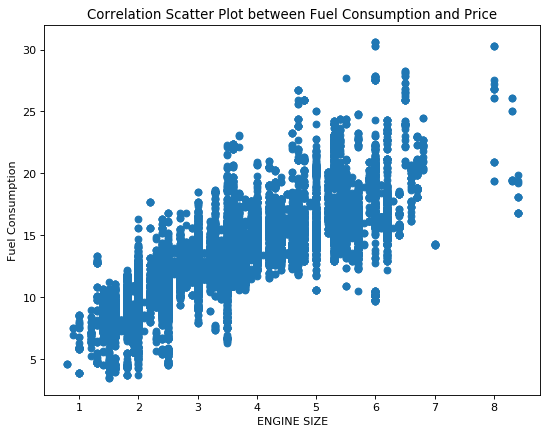

In [23]:
# Suppose you want to visualize the correlation between 'FUEL CONSUMPTION' and 'PRICE'
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x='ENGINE SIZE', y='FUEL CONSUMPTION', data=df)

# Add title and labels
plt.title('Correlation Scatter Plot between Fuel Consumption and Price')
plt.xlabel('ENGINE SIZE')
plt.ylabel('Fuel Consumption')

# Show plot
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


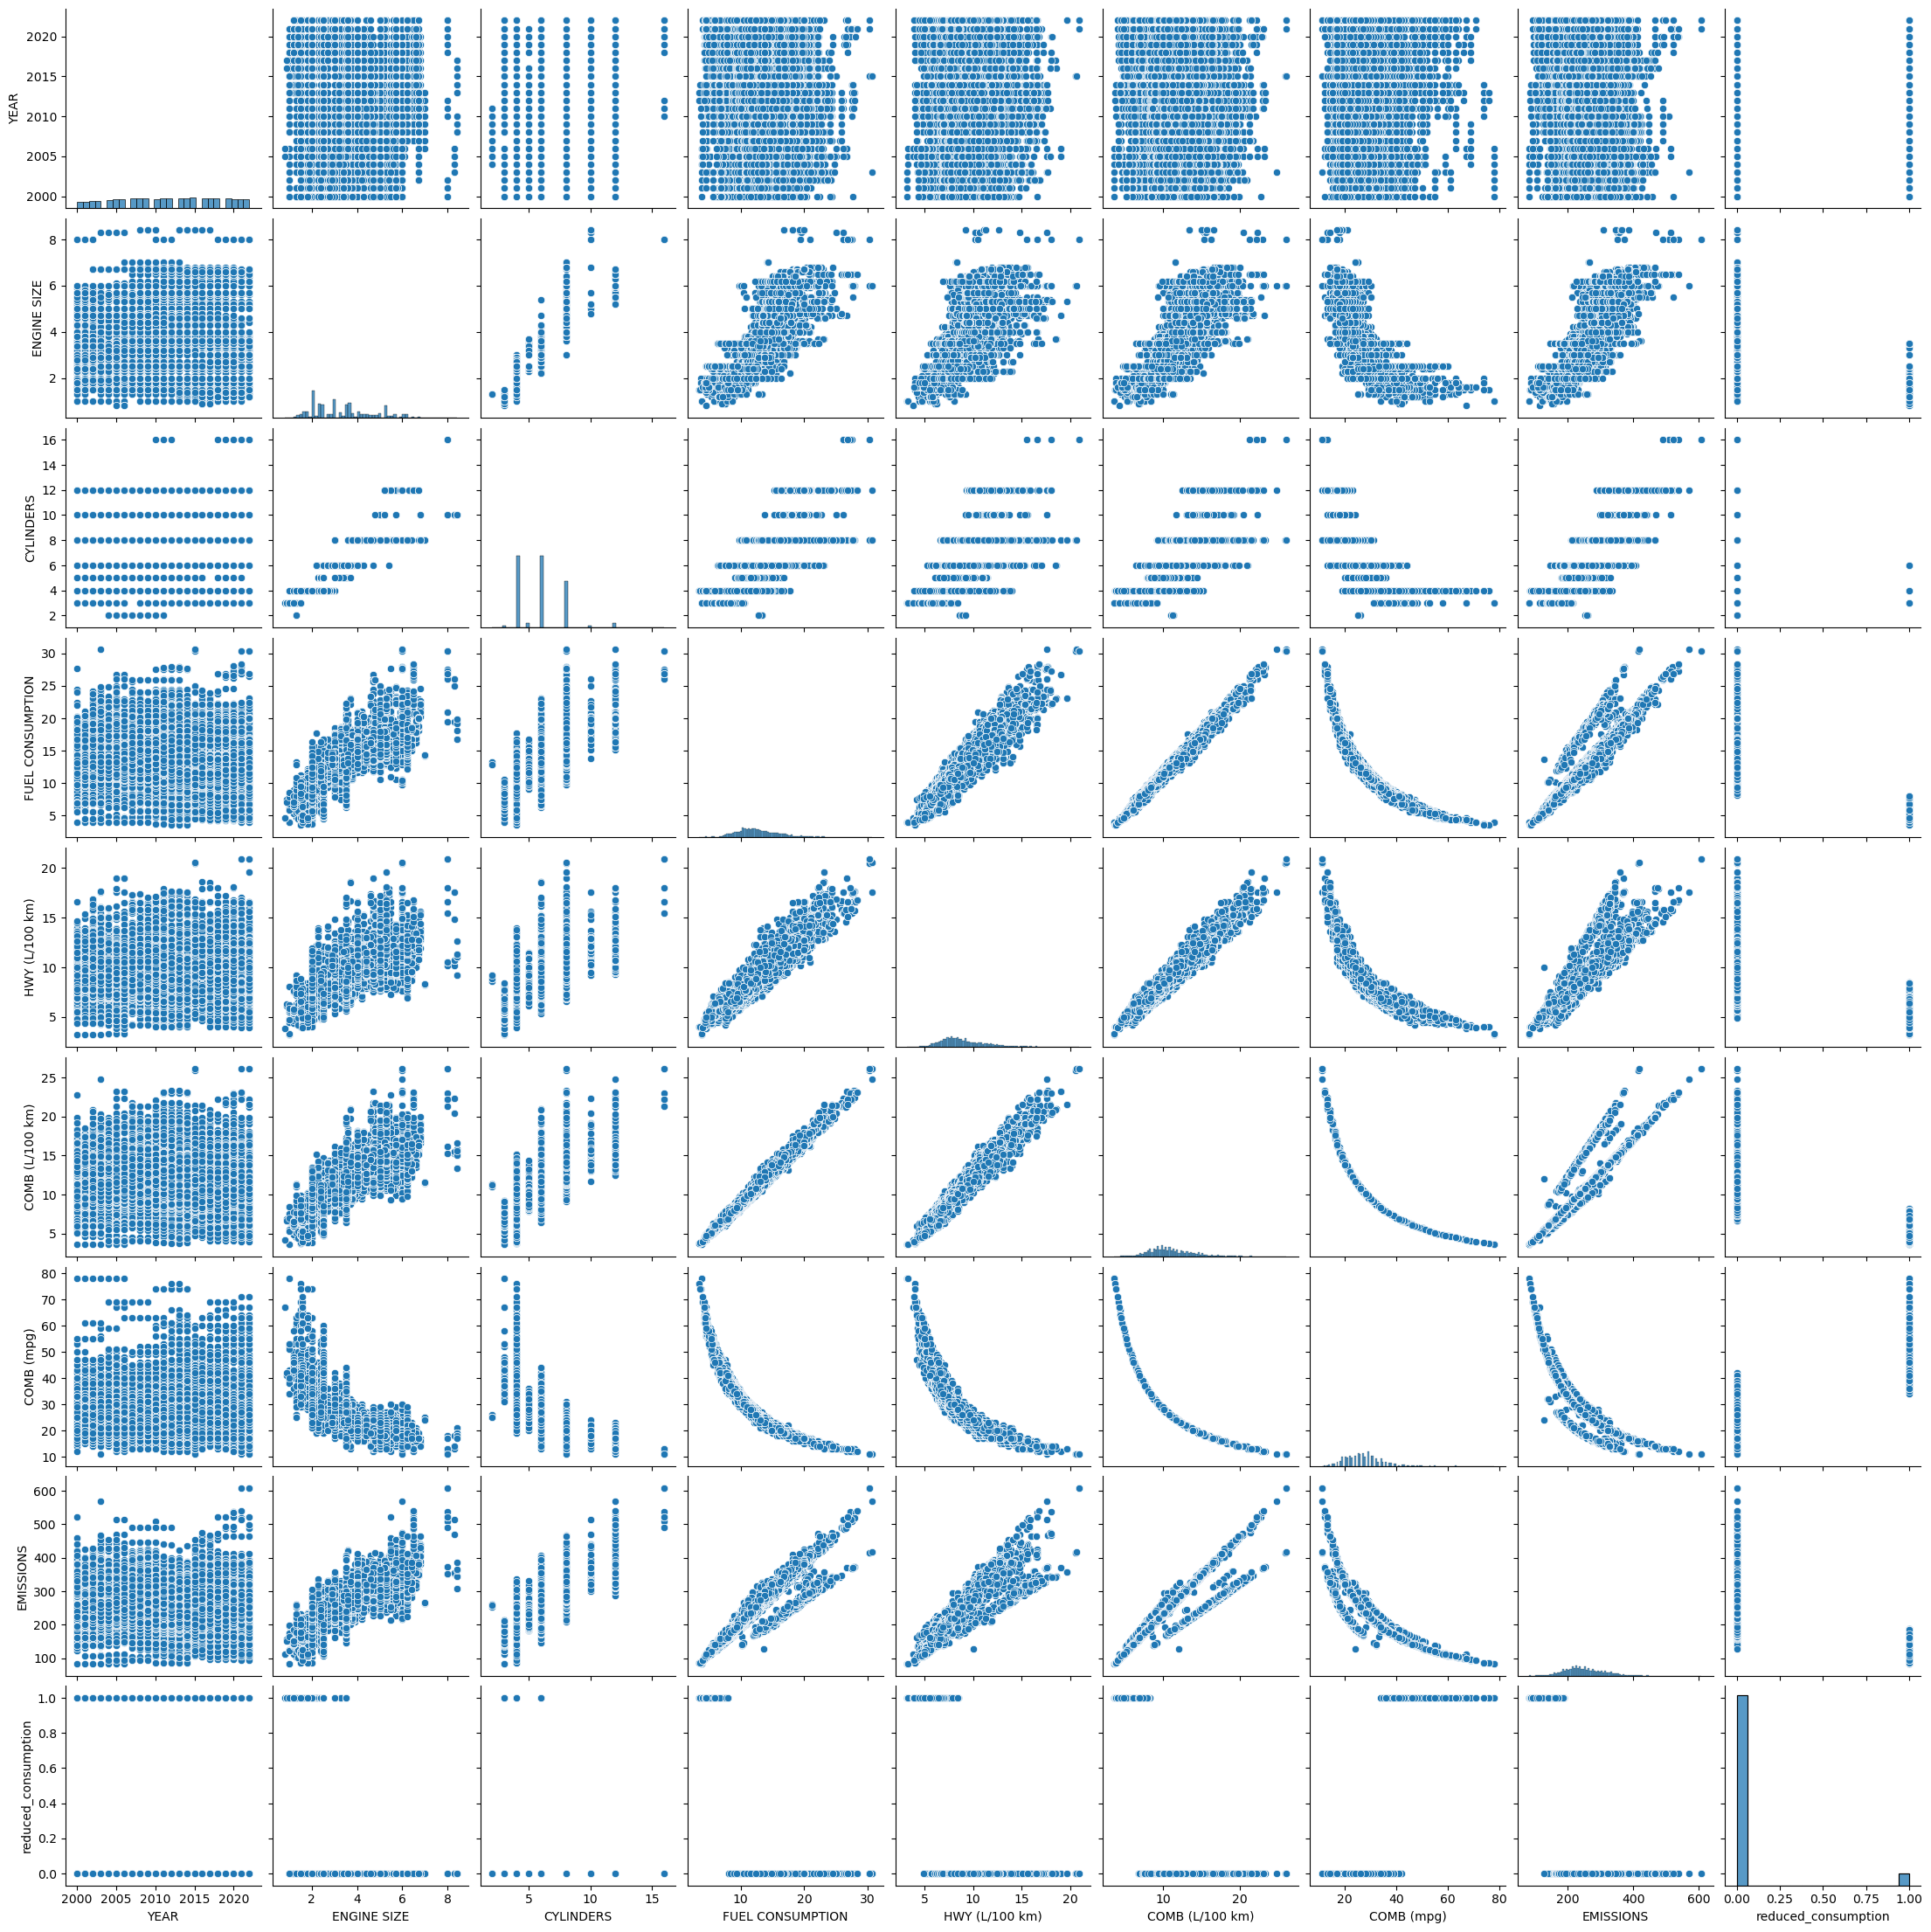

In [26]:
sns.pairplot(df)

# Show the plot
plt.show()

In [41]:
#Create a new column named “Transmission type” from the TRANSMISSION column by separating out the gears from the alphabets. (Hint: use regex)
df[['Transmission type', 'Gears']] = df['TRANSMISSION'].str.extract(r'([A-Z]*)(\d)')

#remplit les valeurs Nan avec 0 et transofrmation de la colonne en integer pour l'utiliser dans la prochaine régression
df['Gears'].fillna(0, inplace=True)
df["Gears"]=df["Gears"].astype('int64')


df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,Gears,Transmission type,reduced_consumption
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,4,A,False
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,5,M,False
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,5,AS,False
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,4,A,False
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,4,A,False


In [44]:

#sorting numerical features
numerical_features=df.select_dtypes(include=['int64', 'float64']).drop('FUEL CONSUMPTION', axis=1)

#regression model 
X_numerical=sm.add_constant(numerical_features)
y=df['FUEL CONSUMPTION']
regression_model=sm.OLS(y, X_numerical).fit()

print(f"The R2 is {regression_model.rsquared}")
print(f"The R2 adjusted is {regression_model.rsquared_adj}")


The R2 is 0.9994596559826403
The R2 adjusted is 0.9994594642608087


In [51]:
#encoded categrorial variables for the linear regression

categorical_features = df.select_dtypes(include=['object']).drop(["TRANSMISSION", "MODEL"], axis=1)

features_encoded=pd.get_dummies(categorical_features, drop_first=True)
X_encoded=sm.add_constant(features_encoded)

model_encoded=sm.OLS(y, X_encoded).fit()

print(f"The R2 is {model_encoded.rsquared}")
print(f"The R2 adjusted is {model_encoded.rsquared_adj}")

The R2 is 0.693124484321658
The R2 adjusted is 0.6914142997715111


In [53]:
#global regression

X_combined = pd.concat([numerical_features, features_encoded], axis=1)

model_global=sm.OLS(y, X_combined).fit()

print(f"The R2 is {model_global.rsquared}")
print(f"The R2 adjusted is {model_global.rsquared_adj}")

The R2 is 0.9999639231992873
The R2 adjusted is 0.9999637092130012
